In [1]:
#this is the analysis portion of homework exercise 1
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from gmaps_api_key import g_key
import ipywidgets as ipw
from IPython.display import display

#read in api data from .csv file

w_df = pd.read_csv("desktop/global_weather_survey_02_17_21.csv")

w_df.head(15)

,city_name,country,date,lat,lon,max_temp_C,max_temp_F,cloud_cover%,humidity%,wind_speed
0,Ushuaia,AR,1613566144,-54.8000,-68.3000,9.00,48.200,75.0,87.0,2.57
1,Pimentel,PE,1613566144,-6.8367,-79.9342,22.22,71.996,0.0,83.0,3.09
2,Atuona,PF,1613566144,-9.8000,-139.0333,25.80,78.440,43.0,77.0,5.49
3,Rawson,AR,1613566145,-43.3002,-65.1023,19.93,67.874,0.0,52.0,5.46
4,Jamestown,US,1613566145,42.0970,-79.2353,-12.78,8.996,90.0,92.0,2.06
5,Salinas,US,1613565859,36.6777,-121.6555,7.00,44.600,1.0,87.0,2.06
6,Hermanus,ZA,1613566146,-34.4187,19.2345,23.89,75.002,2.0,67.0,2.68
7,Pevek,RU,1613566146,69.7008,170.3133,-32.28,-26.104,14.0,87.0,1.68
8,Progreso,MX,1613566146,21.2833,-89.6667,20.00,68.000,90.0,100.0,4.12
9,Katobu,ID,1613566147,-4.9408,122.5276,25.23,77.414,8.0,86.0,1.85


In [2]:
#Filtering temperatures to make temperature isotherms 

#Isotherm Dfs 
#technical note - the filters will not work if they are not each inclosed in parenthesis
aac_df = w_df[w_df['max_temp_C'] < -40]
ac_df = w_df[(w_df['max_temp_C'] < -30) & (w_df['max_temp_C'] >= -40)]
bc_df = w_df[(w_df['max_temp_C'] < -20) & (w_df['max_temp_C'] >= -30)]
cc_df = w_df[(w_df['max_temp_C'] < -10) & (w_df['max_temp_C'] >= -20)]
dc_df = w_df[(w_df['max_temp_C'] < 0) & (w_df['max_temp_C'] >= -10)]
ec_df = w_df[(w_df['max_temp_C'] < 10) & (w_df['max_temp_C'] >= 0)]
fc_df = w_df[(w_df['max_temp_C'] < 20) & (w_df['max_temp_C'] >= 10)]
gc_df = w_df[(w_df['max_temp_C'] < 30) & (w_df['max_temp_C'] >= 20)]
hc_df = w_df[(w_df['max_temp_C'] < 40) & (w_df['max_temp_C'] >= 30)]
ic_df = w_df[w_df['max_temp_C'] >= 40]


#counts output of suitable places

print(f'The number of cities less than -40 C is: {len(aac_df)}')
print(f'The number of cities between -30 and -40 C: {len(ac_df)}')
print(f'The number of cities between -20 and -30 C: {len(bc_df)}')
print(f'The number of cities between -10 and -20 C:: {len(cc_df)}')
print(f'The number of cities between 0 and -10 C:: {len(dc_df)}')
print(f'The number of cities between 0 and 10 C:: {len(ec_df)}')
print(f'The number of cities between 10 and 20 C:: {len(fc_df)}')
print(f'The number of cities between 20 and 30 C:: {len(gc_df)}')
print(f'The number of cities between 30 and 40 C:: {len(hc_df)}')
print(f'The number of cities greater than 40 C:: {len(ic_df)}')


The number of cities less than -40 C is: 0
The number of cities between -30 and -40 C: 22
The number of cities between -20 and -30 C: 36
The number of cities between -10 and -20 C:: 53
The number of cities between 0 and -10 C:: 47
The number of cities between 0 and 10 C:: 74
The number of cities between 10 and 20 C:: 76
The number of cities between 20 and 30 C:: 211
The number of cities between 30 and 40 C:: 35
The number of cities greater than 40 C:: 0


In [3]:
#weather isotherm plot

#temperature categories

temps = ['<-40C', '-40 to -31C', '-30 to -21C', '-20 to -11C', '-10 to -1C', '0 to 9C', '10 to 19C', '20 to 29C', 
         '30 to 39C', '>40C']

colors = ['lightgrey', 'purple','rgba(153, 0, 204, 0.5)','blue', 'rgba(0, 204, 204, 1)','green', 'rgba(255, 204, 102, 1)', 
          'yellow', 'red','rgba(204, 0, 102, 1)']

#copy only coordinates from the isotherm dfs
 
b1 = aac_df[['lat', 'lon']].copy()
b2 = ac_df[['lat', 'lon']].copy()
b3 = bc_df[['lat', 'lon']].copy()
b4 = cc_df[['lat', 'lon']].copy()
b5 = dc_df[['lat', 'lon']].copy()
b6 = ec_df[['lat', 'lon']].copy()
b7 = fc_df[['lat', 'lon']].copy()
b8 = gc_df[['lat', 'lon']].copy()
b9 = hc_df[['lat', 'lon']].copy()
b10 = ic_df[['lat', 'lon']].copy()

#bring in the gmaps api
gmaps.configure(api_key = g_key)

#figure layout table

fig_layout = {
    'width' : '500px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

wea_map = gmaps.figure(layout = fig_layout)


#define layers for the isotherms
aa_lay = gmaps.symbol_layer(b1, fill_color = 'rgba(101, 101, 101, 0.5)', stroke_color = 'rgba(101, 101, 101, 0.5)')
a_lay = gmaps.symbol_layer(b2, fill_color = 'purple', stroke_color = 'purple')
b_lay = gmaps.symbol_layer(b3, fill_color = 'rgba(153, 0, 204, 0.5)', stroke_color = 'rgba(153, 0, 204, 0.5)')
c_lay = gmaps.symbol_layer(b4, fill_color = 'blue', stroke_color = 'blue')
d_lay = gmaps.symbol_layer(b5, fill_color = 'rgba(0, 204, 204, 1)', stroke_color = 'rgba(0, 204, 204, 1)')
e_lay = gmaps.symbol_layer(b6, fill_color = 'green', stroke_color = 'green')
f_lay = gmaps.symbol_layer(b7, fill_color = 'rgba(255, 204, 102, 1)', stroke_color = 'rgba(255, 204, 102, 1)')
g_lay = gmaps.symbol_layer(b8, fill_color = 'yellow', stroke_color = 'yellow')
h_lay = gmaps.symbol_layer(b9, fill_color = 'red', stroke_color = 'red')
i_lay = gmaps.symbol_layer(b10, fill_color = 'rgba(204, 0, 102, 1)', stroke_color = 'rgba(204, 0, 102, 1)')

#add layers to the figure
wea_map.add_layer(aa_lay)
wea_map.add_layer(a_lay)
wea_map.add_layer(b_lay)
wea_map.add_layer(c_lay)
wea_map.add_layer(d_lay)
wea_map.add_layer(e_lay)
wea_map.add_layer(f_lay)
wea_map.add_layer(g_lay)
wea_map.add_layer(h_lay)
wea_map.add_layer(i_lay)



wea_map

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [4]:
#make the above figure interactive

#bring in the gmaps api
gmaps.configure(api_key = g_key)



# define a togglebutton widget to turn temperature band layers on and off
l0 = ipw.ToggleButton(value = False, description = temps[0], disabled = False)
l1 = ipw.ToggleButton(value = False, description = temps[1], disabled = False)
l2 = ipw.ToggleButton(value = False, description = temps[2], disabled = False)
l3 = ipw.ToggleButton(value = False, description = temps[3], disabled = False)
l4 = ipw.ToggleButton(value = False, description = temps[4], disabled = False)
l5 = ipw.ToggleButton(value = False, description = temps[5], disabled = False)
l6 = ipw.ToggleButton(value = False, description = temps[6], disabled = False)
l7 = ipw.ToggleButton(value = False, description = temps[7], disabled = False)
l8 = ipw.ToggleButton(value = False, description = temps[8], disabled = False)
l9 = ipw.ToggleButton(value = False, description = temps[9], disabled = False)


In [6]:
#this list is important for calling the values. The Box widgets get confused if you call the variable names directly. 
cb1 = [l0, l1, l2, l3, l4, l5, l6, l7, l8, l9]



def inter_wea(l0, l1, l2, l3, l4, l5, l6, l7, l8, l9):
    #putting the line below inside the definition allows the map to refresh and respond to temperature deselection
    wea_map2 = gmaps.figure(layout = fig_layout)
    

    
    #the block below links the checkbox status to layer display on the map
    if l0 == True:
        wea_map2.add_layer(aa_lay)
    if l1 == True:
        wea_map2.add_layer(a_lay)
    if l2 == True:
        wea_map2.add_layer(b_lay)
    if l3 == True:
        wea_map2.add_layer(c_lay)
    if l4 == True:
        wea_map2.add_layer(d_lay)
    if l5 == True:
        wea_map2.add_layer(e_lay)
    if l6 == True:
        wea_map2.add_layer(f_lay)
    if l7 == True:
        wea_map2.add_layer(g_lay)
    if l8 == True:
        wea_map2.add_layer(h_lay)
    if l9 == True:
        wea_map2.add_layer(i_lay)
    
    #display checkboxes as intended    
    b1 = ipw.VBox([cb1[0], cb1[1]])
    b2 = ipw.VBox([cb1[2], cb1[3]])
    b3 = ipw.VBox([cb1[4], cb1[5]])
    b4 = ipw.VBox([cb1[6], cb1[7]])
    b5 = ipw.VBox([cb1[8], cb1[9]])

    t_leg = ipw.HBox([b1, b2, b3, b4, b5])  
    # The display command is necessary for the map to be shown   
    display(wea_map2)  
    display(t_leg)   
     
   

#interactive_output is like interactive, but you need to use interactive_output to control layout

iwm = ipw.interactive_output(inter_wea, {'l0':l0, 'l1':l1, 'l2':l2, 'l3':l3, 
                                        'l4':l4, 'l5':l5, 'l6':l6, 'l7':l7, 'l8':l8, 'l9':l9})



display(iwm)


Output()

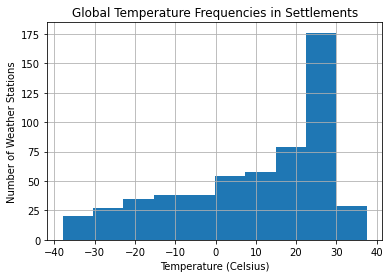

In [7]:
#histogram of global temperatures

w_df['max_temp_C'].hist()

plt.title('Global Temperature Frequencies in Settlements')
plt.ylabel('Number of Weather Stations')
plt.xlabel('Temperature (Celsius)')

plt.show()